In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
%matplotlib inline

In [2]:
df_original = pd.read_csv('Desktop/Thinkful/Austin_crime.csv')
df_original.head(3)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2019891702,CRIMINAL TRESPASS,2716,N,03/30/2019 08:44:00 PM,03/30/2019,2044.0,03/30/2019 08:59:00 PM,03/30/2019,2059.0,...,11.00,C,03/30/2019,NaN,NaN,3117057.0,3117057.0,30.269060,-97.734085,"(30.26905967, -97.73408544)"
1,20195013370,THEFT,600,N,03/23/2019 06:00:00 PM,03/23/2019,1800.0,04/01/2019 03:47:00 PM,04/01/2019,1547.0,...,21.07,N,04/03/2019,23H,Theft,3133783.0,3133783.0,30.302208,-97.680177,"(30.30220794, -97.6801768)"
2,20172571868,AGG ROBBERY/DEADLY WEAPON,300,N,09/14/2017 10:37:00 PM,09/14/2017,2237.0,09/14/2017 10:37:00 PM,09/14/2017,2237.0,...,18.04,O,09/20/2017,120,Robbery,3125442.0,3125442.0,30.333542,-97.705762,"(30.33354183, -97.70576196)"


## General Information

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2124418 entries, 0 to 2124417
Data columns (total 27 columns):
Incident Number                int64
Highest Offense Description    object
Highest Offense Code           int64
Family Violence                object
Occurred Date Time             object
Occurred Date                  object
Occurred Time                  float64
Report Date Time               object
Report Date                    object
Report Time                    float64
Location Type                  object
Address                        object
Zip Code                       float64
Council District               float64
APD Sector                     object
APD District                   object
PRA                            object
Census Tract                   float64
Clearance Status               object
Clearance Date                 object
UCR Category                   object
Category Description           object
X-coordinate                   float64
Y-coordin

In [4]:
nRow, nCol = df_original.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2124418 rows and 27 columns


In [5]:
df = df_original.copy()
del df['Incident Number']
del df['Highest Offense Code']
del df['Family Violence']
del df['Clearance Status']
del df['Council District']
del df['APD Sector']
del df['Census Tract']
del df['UCR Category']

del df['APD District']
del df['PRA']
del df['Clearance Date']

# Missing Values

In [6]:
df.isnull().sum()*100/df.isnull().count()

Highest Offense Description     0.000000
Occurred Date Time              0.007908
Occurred Date                   0.000000
Occurred Time                   0.004048
Report Date Time                0.000047
Report Date                     0.000000
Report Time                     0.000047
Location Type                   0.973067
Address                         0.000565
Zip Code                        0.627325
Category Description           66.399550
X-coordinate                    0.447181
Y-coordinate                    0.447181
Latitude                        1.685497
Longitude                       1.685497
Location                        1.685497
dtype: float64

### 1. Date-time

In [7]:
df[['Occurred Date Time', 'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date', 'Report Time']]

,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time
0,03/30/2019 08:44:00 PM,03/30/2019,2044.0,03/30/2019 08:59:00 PM,03/30/2019,2059.0
1,03/23/2019 06:00:00 PM,03/23/2019,1800.0,04/01/2019 03:47:00 PM,04/01/2019,1547.0
2,09/14/2017 10:37:00 PM,09/14/2017,2237.0,09/14/2017 10:37:00 PM,09/14/2017,2237.0
3,04/02/2019 01:49:00 AM,04/02/2019,149.0,04/02/2019 01:49:00 AM,04/02/2019,149.0
4,03/30/2019 10:36:00 PM,03/30/2019,2236.0,03/30/2019 10:36:00 PM,03/30/2019,2236.0
...,...,...,...,...,...,...
2124413,08/28/2018 07:09:00 PM,08/28/2018,1909.0,08/28/2018 07:47:00 PM,08/28/2018,1947.0
2124414,11/30/2010 03:29:00 PM,11/30/2010,1529.0,11/30/2010 03:29:00 PM,11/30/2010,1529.0
2124415,04/18/2007 08:40:00 PM,04/18/2007,2040.0,04/18/2007 10:43:00 PM,04/18/2007,2243.0
2124416,12/15/2009 05:15:00 PM,12/15/2009,1715.0,12/15/2009 10:38:00 PM,12/15/2009,2238.0


In [8]:
df[df['Report Date Time'].isnull()]

,Highest Offense Description,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2094055,PROSTITUTION,NaN,08/29/2003,NaN,NaN,08/29/2003,NaN,NaN,3600 S CONGRESS AVE,78704.0,NaN,3108710.0,3108710.0,30.227992,-97.761627,"(30.22799205, -97.76162732)"


In [9]:
df[df['Report Date Time'] == 'NaN']

,Highest Offense Description,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location


In [10]:
df['Report Time'] = df['Report Time'].apply(lambda x: 0 if pd.isnull(x) else x)


In [11]:
del df['Occurred Date Time']
del df['Occurred Date']
del df['Occurred Time']


In [12]:
#df['report_dt'] = pd.to_datetime(df['Report Date Time'], format='%m/%d/%Y %I:%M:%S %p')
df['hour']= pd.to_datetime(df['Report Date Time'], format='%m/%d/%Y %I:%M:%S %p').dt.hour
df['year']= pd.to_datetime(df['Report Date'], format='%m/%d/%Y').dt.year

### 2. Location Type

In [13]:
df['Location Type'] = df['Location Type'].apply(lambda x: 'Other' if pd.isnull(x) else x)

### 3. Address

In [14]:
df[df['Address'].isnull()]

,Highest Offense Description,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,hour,year
55320,POSS CONTROLLED SUB/NARCOTIC,04/18/2005 02:53:00 PM,04/18/2005,1453.0,Other,NaN,NaN,NaN,3121801.0,3121801.0,30.269700,-97.719036,"(30.26969963, -97.71903643)",14.0,2005
226945,DWI,08/24/2005 03:03:00 AM,08/24/2005,303.0,STREETS / HWY / ROAD / ALLEY,NaN,NaN,NaN,3129699.0,3129699.0,30.351737,-97.691766,"(30.35173678, -97.69176609)",3.0,2005
356999,COUNTERFEITING,05/30/2005 01:36:00 PM,05/30/2005,1336.0,RESIDENCE / HOME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,2005
555911,CRIMINAL TRESPASS,01/20/2007 07:07:00 PM,01/20/2007,1907.0,TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,2007
587545,VOCO - ALCOHOL CONSUMPTION,06/28/2008 07:06:00 PM,06/28/2008,1906.0,STREETS / HWY / ROAD / ALLEY,NaN,NaN,NaN,3115316.0,3115316.0,30.266131,-97.739681,"(30.26613118, -97.73968058)",19.0,2008
674647,CUSTODY ARREST TRAFFIC WARR,01/16/2006 08:30:00 PM,01/16/2006,2030.0,STREETS / HWY / ROAD / ALLEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,2006
817065,WARRANT ARREST NON TRAFFIC,12/07/2010 06:52:00 PM,12/07/2010,1852.0,STREETS / HWY / ROAD / ALLEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,2010
1020451,FRAUD - OTHER,12/13/2009 06:05:00 PM,12/13/2009,1805.0,RESIDENCE / HOME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,2009
1156886,CRIMINAL MISCHIEF,09/23/2005 09:47:00 PM,09/23/2005,2147.0,RESIDENCE / HOME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,2005
1295870,WARRANT ARREST NON TRAFFIC,07/21/2006 09:49:00 AM,07/21/2006,949.0,STREETS / HWY / ROAD / ALLEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2006


### 4. Zip Code

In [15]:
df['Zip Code'] = df['Zip Code'].apply(lambda x: str(x)[:5])

In [16]:
df[df['Zip Code'] == '0.0'].sort_values(by = 'year')

,Highest Offense Description,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,hour,year
1125271,FAILURE TO IDENTIFY,06/05/2003 05:35:00 PM,06/05/2003,1735.0,STREETS / HWY / ROAD / ALLEY,800 INDIAN MOUND RD,0.0,NaN,2998522.0,2998522.0,30.473163,-98.104946,"(30.47316308, -98.10494576)",17.0,2003
152191,CUSTODY ARREST TRAFFIC WARR,12/26/2003 11:22:00 PM,12/26/2003,2322.0,STREETS / HWY / ROAD / ALLEY,11600 BLOCK N FM 620 RD,0.0,NaN,3086996.0,3086996.0,30.456737,-97.824457,"(30.45673748, -97.82445738)",23.0,2003
1212606,CUSTODY ARREST TRAFFIC WARR,10/30/2003 02:00:00 PM,10/30/2003,1400.0,Other,414 KRAUSE SPRINGS RD,0.0,NaN,2984859.0,2984859.0,30.478606,-98.148203,"(30.47860645, -98.14820274)",14.0,2003
1876881,BURGLARY OF VEHICLE,02/01/2004 07:25:00 PM,02/01/2004,1925.0,COMMERCIAL / OFFICE BUILDING,101 ELIZABETH DR,0.0,Theft,2985563.0,2985563.0,30.517440,-98.145085,"(30.5174404, -98.14508531)",19.0,2004
130107,VIOL OF PARK CURFEW,08/14/2004 10:29:00 PM,08/14/2004,2229.0,GOVERNMENT / PUBLIC BUILDING,400 RUSTIC LN,0.0,NaN,2995332.0,2995332.0,30.474933,-98.115033,"(30.47493284, -98.11503339)",22.0,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671145,BURGLARY OF VEHICLE,04/17/2008 02:26:00 AM,04/17/2008,226.0,STREETS / HWY / ROAD / ALLEY,100 BLOCK ELIZABETH DR,0.0,Theft,2985563.0,2985563.0,30.517440,-98.145085,"(30.5174404, -98.14508531)",2.0,2008
31167,INDECENCY WITH A CHILD/CONTACT,04/21/2008 02:11:00 PM,04/21/2008,1411.0,RESIDENCE / HOME,11000 BLOCK MARBLE RD,0.0,NaN,0.0,0.0,NaN,NaN,NaN,14.0,2008
1084956,HARASSMENT,02/17/2009 12:31:00 PM,02/17/2009,1231.0,RESIDENCE / HOME,10507 MELLOW MEADOWS,0.0,NaN,3094838.0,3094838.0,30.460815,-97.799454,"(30.46081473, -97.79945431)",12.0,2009
34916,IDENTITY THEFT,02/10/2009 03:26:00 PM,02/10/2009,1526.0,RESIDENCE / HOME,10604 GUNGROVE DR,0.0,NaN,3091653.0,3091653.0,30.448814,-97.809880,"(30.44881416, -97.80988041)",15.0,2009


In [17]:
df[df['Zip Code'] == '0.0'].sort_values(by = 'year').count()

Highest Offense Description    62
Report Date Time               62
Report Date                    62
Report Time                    62
Location Type                  62
Address                        62
Zip Code                       62
Category Description           17
X-coordinate                   62
Y-coordinate                   62
Latitude                       61
Longitude                      61
Location                       61
hour                           62
year                           62
dtype: int64

Just 62 rows and all before 2009 year. Since they aren't recent data we can get rid of them.

In [18]:
df = df[df['Zip Code'] != '0.0']

In [19]:
df[df['Zip Code'] == 'nan'].sort_values(by = 'year')

,Highest Offense Description,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,hour,year
1137875,CUSTODY ARREST TRAFFIC WARR,07/16/2003 12:19:00 PM,07/16/2003,1219.0,RESIDENCE / HOME,5108 WEIDERMAN LANE,nan,NaN,NaN,NaN,NaN,NaN,NaN,12.0,2003
758086,POSS OF DRUG PARAPHERNALIA,03/19/2003 04:05:00 AM,03/19/2003,405.0,PARKING LOTS / GARAGE,7631 W US HWY 290,nan,NaN,2774649.0,2774649.0,4.109756,-99.150677,"(4.10975607, -99.15067721)",4.0,2003
450458,UNAUTHORIZED USE VEH-EXPIRED,03/05/2003 08:07:00 AM,03/05/2003,807.0,RESIDENCE / HOME,8220 W STATE HWY 71,nan,NaN,2772846.0,2772846.0,4.123031,-99.154998,"(4.12303067, -99.15499766)",8.0,2003
555961,ASSAULT BY THREAT,07/20/2003 10:50:00 PM,07/20/2003,2250.0,RESIDENCE / HOME,7655 N F M 620,nan,NaN,NaN,NaN,NaN,NaN,NaN,22.0,2003
344261,WARRANT ARREST NON TRAFFIC,04/30/2003 09:18:00 AM,04/30/2003,918.0,PARKING LOTS / GARAGE,7010 W STATE HWY 71,nan,NaN,2775999.0,2775999.0,4.113881,-99.147294,"(4.11388085, -99.1472936)",9.0,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5177,FAMILY DISTURBANCE/PARENTAL,03/28/2019 06:58:00 PM,03/28/2019,1858.0,RESIDENCE / HOME,1306 QUAILFIELD DR,nan,NaN,NaN,NaN,NaN,NaN,NaN,18.0,2019
244912,PROTECTIVE ORDER,01/31/2019 08:04:00 PM,01/31/2019,2004.0,RESIDENCE / HOME,UNKNOWN,nan,NaN,NaN,NaN,NaN,NaN,NaN,20.0,2019
244763,DATING DISTURBANCE,01/24/2019 08:31:00 PM,01/24/2019,2031.0,RESIDENCE / HOME,6600 ED BLUESTEIN BLVD,nan,NaN,NaN,NaN,NaN,NaN,NaN,20.0,2019
193874,FAMILY DISTURBANCE,01/14/2019 10:29:00 PM,01/14/2019,2229.0,RESIDENCE / HOME,11320 MENCHACA RD,nan,NaN,NaN,NaN,NaN,NaN,NaN,22.0,2019


In [20]:
#df = df[df['Zip Code'] != '0']

In [21]:
#13327 rows we can't delete. So will try to fill values

In [22]:
from uszipcode import SearchEngine, SimpleZipcode, Zipcode

### 5. Category Description

In [23]:
df[df['Category Description'].isnull()]

,Highest Offense Description,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,hour,year
0,CRIMINAL TRESPASS,03/30/2019 08:59:00 PM,03/30/2019,2059.0,GAS / SERVICE STATIONS,900 N IH 35 SVRD SB,78701,NaN,3117057.0,3117057.0,30.269060,-97.734085,"(30.26905967, -97.73408544)",20.0,2019
3,FAMILY DISTURBANCE,04/02/2019 01:49:00 AM,04/02/2019,149.0,RESTAURANTS,7100 N IH 35 SVRD SB,78752,NaN,3125614.0,3125614.0,30.332481,-97.705246,"(30.3324806, -97.70524551)",1.0,2019
4,POSS MARIJUANA,03/30/2019 10:36:00 PM,03/30/2019,2236.0,STREETS / HWY / ROAD / ALLEY,1500 N IH 35 SVRD SB,78701,NaN,3117721.0,3117721.0,30.274861,-97.731825,"(30.27486103, -97.73182518)",22.0,2019
5,DISTURBANCE - OTHER,03/31/2019 04:44:00 PM,03/31/2019,1644.0,RESIDENCE / HOME,6906 CARVER AVE,78752,NaN,3126857.0,3126857.0,30.328285,-97.701419,"(30.3282848, -97.70141883)",16.0,2019
7,FORGERY - OTHER,03/30/2019 05:10:00 PM,03/30/2019,1710.0,COMMERCIAL / OFFICE BUILDING,7514 N MOPAC EXPY SVRD SB,78731,NaN,3112284.0,3112284.0,30.357037,-97.746852,"(30.35703739, -97.74685191)",17.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124411,VIOL OF CAMPING ORDINANCE,09/03/2007 10:11:00 PM,09/03/2007,2211.0,GOVERNMENT / PUBLIC BUILDING,400 COMAL ST,78702,NaN,3119223.0,3119223.0,30.261317,-97.727431,"(30.26131706, -97.72743133)",22.0,2007
2124412,POSS CONTROLLED SUB/NARCOTIC,05/22/2003 10:18:00 PM,05/22/2003,2218.0,FIELD / WOODS,100 RED RIVER ST,78701,NaN,3115558.0,3115558.0,30.261718,-97.739032,"(30.26171751, -97.73903241)",22.0,2003
2124413,FAMILY DISTURBANCE,08/28/2018 07:47:00 PM,08/28/2018,1947.0,RESIDENCE / HOME,1901 ONION CREEK PKWY,78748,NaN,3097240.0,3097240.0,30.137575,-97.800326,"(30.13757481, -97.80032624)",19.0,2018
2124415,CRIMINAL TRESPASS,04/18/2007 10:43:00 PM,04/18/2007,2243.0,RESIDENCE / HOME,1801 E 4TH ST,78702,NaN,3120371.0,3120371.0,30.259833,-97.723834,"(30.25983293, -97.72383422)",22.0,2007


In [24]:
del df['Category Description']

In [25]:
df.dropna()

,Highest Offense Description,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,X-coordinate,Y-coordinate,Latitude,Longitude,Location,hour,year
0,CRIMINAL TRESPASS,03/30/2019 08:59:00 PM,03/30/2019,2059.0,GAS / SERVICE STATIONS,900 N IH 35 SVRD SB,78701,3117057.0,3117057.0,30.269060,-97.734085,"(30.26905967, -97.73408544)",20.0,2019
1,THEFT,04/01/2019 03:47:00 PM,04/01/2019,1547.0,RESIDENCE / HOME,5512 GLOUCESTER LN,78723,3133783.0,3133783.0,30.302208,-97.680177,"(30.30220794, -97.6801768)",15.0,2019
2,AGG ROBBERY/DEADLY WEAPON,09/14/2017 10:37:00 PM,09/14/2017,2237.0,STREETS / HWY / ROAD / ALLEY,E ST JOHNS AVE / ROLAND JOHNSON DR,78752,3125442.0,3125442.0,30.333542,-97.705762,"(30.33354183, -97.70576196)",22.0,2017
3,FAMILY DISTURBANCE,04/02/2019 01:49:00 AM,04/02/2019,149.0,RESTAURANTS,7100 N IH 35 SVRD SB,78752,3125614.0,3125614.0,30.332481,-97.705246,"(30.3324806, -97.70524551)",1.0,2019
4,POSS MARIJUANA,03/30/2019 10:36:00 PM,03/30/2019,2236.0,STREETS / HWY / ROAD / ALLEY,1500 N IH 35 SVRD SB,78701,3117721.0,3117721.0,30.274861,-97.731825,"(30.27486103, -97.73182518)",22.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124413,FAMILY DISTURBANCE,08/28/2018 07:47:00 PM,08/28/2018,1947.0,RESIDENCE / HOME,1901 ONION CREEK PKWY,78748,3097240.0,3097240.0,30.137575,-97.800326,"(30.13757481, -97.80032624)",19.0,2018
2124414,BURGLARY OF VEHICLE,11/30/2010 03:29:00 PM,11/30/2010,1529.0,PARKING LOTS / GARAGE,12410 N LAMAR BLVD,78758,3133289.0,3133289.0,30.406682,-97.678869,"(30.40668179, -97.67886904)",15.0,2010
2124415,CRIMINAL TRESPASS,04/18/2007 10:43:00 PM,04/18/2007,2243.0,RESIDENCE / HOME,1801 E 4TH ST,78702,3120371.0,3120371.0,30.259833,-97.723834,"(30.25983293, -97.72383422)",22.0,2007
2124416,BURGLARY OF VEHICLE,12/15/2009 10:38:00 PM,12/15/2009,2238.0,PARKING LOTS / GARAGE,3110 ESPERANZA XING,78758,3119609.0,3119609.0,30.399350,-97.722476,"(30.39935012, -97.72247569)",22.0,2009


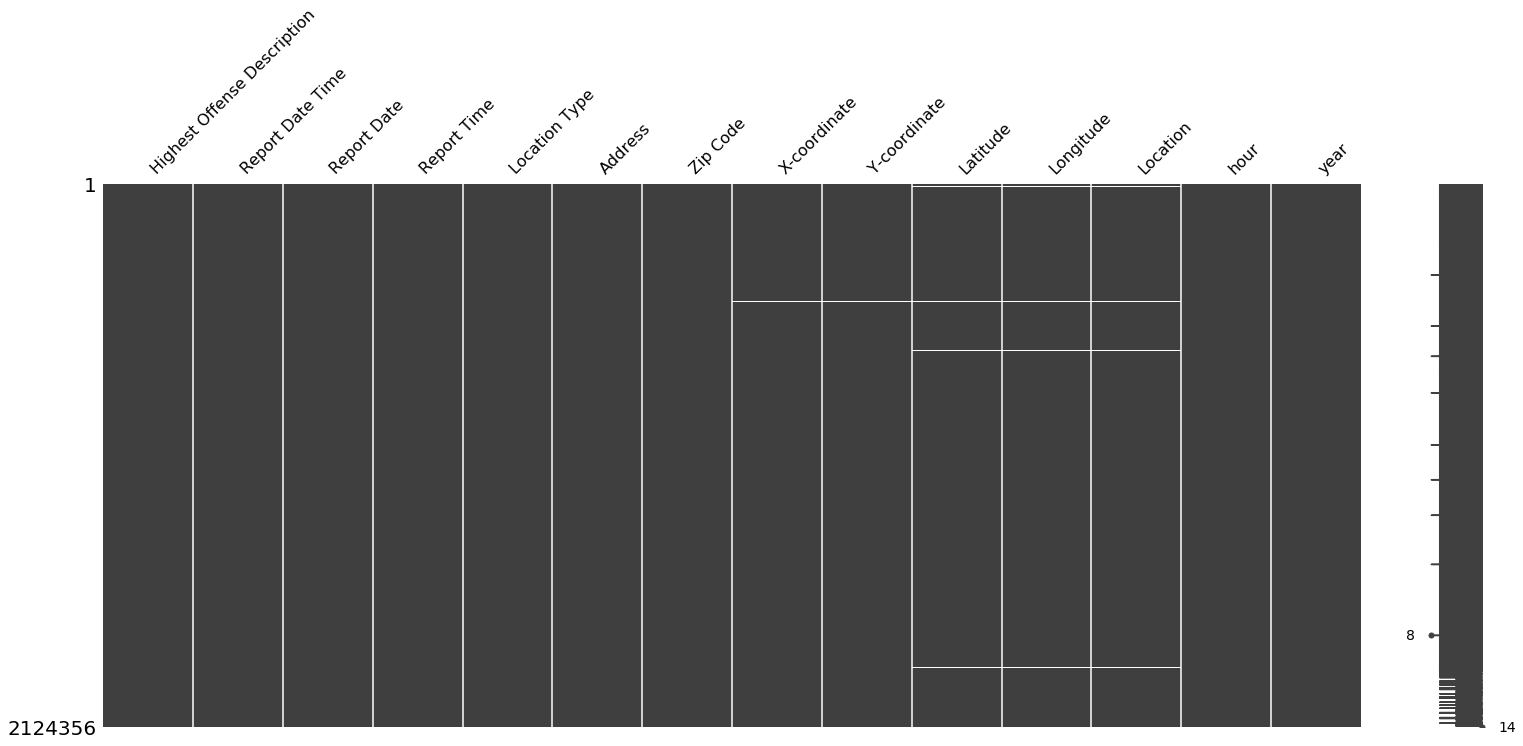

In [26]:
import missingno as msno
#missing values
df.isnull().sum()*100/df.isnull().count()

# Create nullity matrix for missing values 

msno.matrix(df)

In [27]:
df.replace([np.inf, -np.inf], np.nan)
df.dropna(axis=0,  inplace=True)

In [28]:
df['Highest Offense Description'].value_counts().head()

BURGLARY OF VEHICLE      212395
THEFT                    196054
FAMILY DISTURBANCE       159805
CRIMINAL MISCHIEF        116751
BURGLARY OF RESIDENCE     73475
Name: Highest Offense Description, dtype: int64

Text(0.5, 1.0, '20 the most committed crimes')

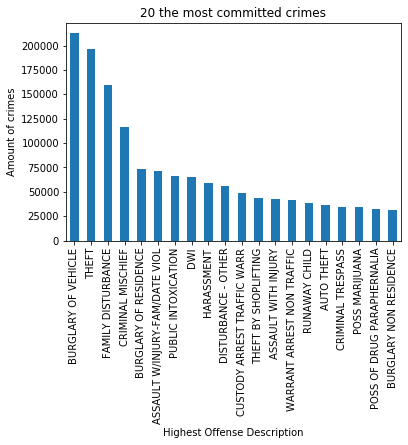

In [29]:
df['Highest Offense Description'].value_counts().head(20).plot(kind='bar')

plt.xlabel("Highest Offense Description")
plt.ylabel("Amount of crimes")
plt.title('20 the most committed crimes')

# Crime per year

Text(0.5, 1.0, 'Number of reported crimes per year')

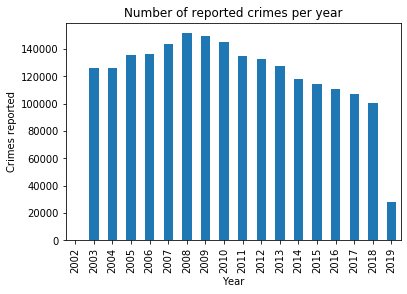

In [30]:
df['year'].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel("Year")
plt.ylabel("Crimes reported")
plt.title('Number of reported crimes per year')

Looks like there was a peak in crimes reported in 2008 but since then there's a steady decline. It's interesing to see the most popular crime in 2008.

In [31]:
df[df.year==2008].groupby('Highest Offense Description').year.count().sort_values(ascending=False).head(5)

Highest Offense Description
THEFT                  15637
BURGLARY OF VEHICLE    14286
FAMILY DISTURBANCE      9279
CRIMINAL MISCHIEF       9092
PUBLIC INTOXICATION     5853
Name: year, dtype: int64

Text(0.5, 1.0, '5 the most popular crimes in 2008')

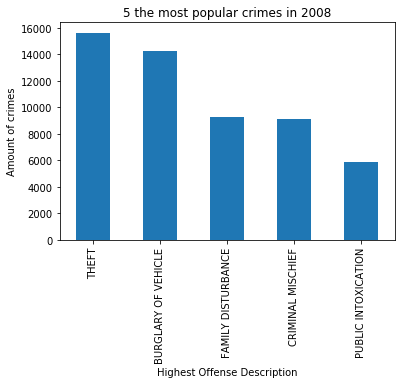

In [32]:
df[df.year==2008].groupby('Highest Offense Description').year.count().sort_values(ascending=False).head(5).plot(kind = 'bar')

plt.xlabel("Highest Offense Description")
plt.ylabel("Amount of crimes")

plt.title('5 the most popular crimes in 2008')

We see that the most committed crime in 2008 year is the theft.

Let's take a look at the most popular crimes for each year.

In [33]:
for i in np.sort(df.year.unique()):
    print(i)
    print(df[df.year==i].groupby('Highest Offense Description').year.count().sort_values(ascending=False).head(5))



2002
Highest Offense Description
FAMILY DISTURBANCE    1
Name: year, dtype: int64
2003
Highest Offense Description
BURGLARY OF VEHICLE            16111
THEFT                           9434
CRIMINAL MISCHIEF               8239
FAMILY DISTURBANCE              7447
CUSTODY ARREST TRAFFIC WARR     5239
Name: year, dtype: int64
2004
Highest Offense Description
BURGLARY OF VEHICLE            15054
THEFT                          11272
FAMILY DISTURBANCE              7633
CRIMINAL MISCHIEF               7604
CUSTODY ARREST TRAFFIC WARR     5106
Name: year, dtype: int64
2005
Highest Offense Description
BURGLARY OF VEHICLE    15538
THEFT                  11855
FAMILY DISTURBANCE      9177
CRIMINAL MISCHIEF       8926
PUBLIC INTOXICATION     5260
Name: year, dtype: int64
2006
Highest Offense Description
BURGLARY OF VEHICLE    14439
THEFT                  13209
FAMILY DISTURBANCE      9592
CRIMINAL MISCHIEF       8676
PUBLIC INTOXICATION     5607
Name: year, dtype: int64
2007
Highest Offense Descr

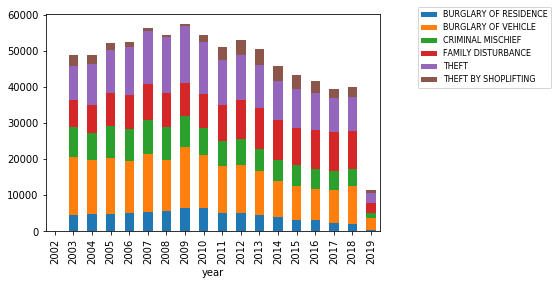

In [34]:
df[df['Highest Offense Description'].\
   isin(['BURGLARY OF VEHICLE', 'THEFT', 'CRIMINAL MISCHIEF','FAMILY DISTURBANCE', 'THEFT BY SHOPLIFTING', 'BURGLARY OF RESIDENCE'])].groupby(['year', 'Highest Offense Description']).Location.count().sort_values(ascending=False).unstack().plot(kind='bar', legend='best', stacked=True)
plt.legend(loc='best', prop={'size': 8}, bbox_to_anchor=(1.1, 1.05))

We see that "family disturbance" goes up and we take a look at it more detailed. We will pay attention on "burglary of veicle", "criminal mischief" and "theft".

### Last 5 years

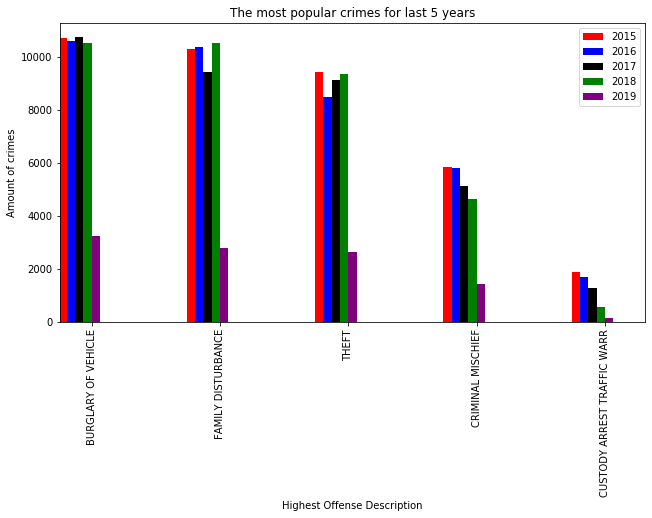

In [35]:
y_14 = df[(df.year==2014) & (df['Highest Offense Description'].\
   isin(['BURGLARY OF VEHICLE', 'THEFT', 'CRIMINAL MISCHIEF','FAMILY DISTURBANCE', 'CUSTODY ARREST TRAFFIC WARR']))].groupby('Highest Offense Description').year.count().sort_values(ascending=False)
y_15 = df[(df.year==2015) & (df['Highest Offense Description'].\
   isin(['BURGLARY OF VEHICLE', 'THEFT', 'CRIMINAL MISCHIEF','FAMILY DISTURBANCE', 'CUSTODY ARREST TRAFFIC WARR']))].groupby('Highest Offense Description').year.count().sort_values(ascending=False)
y_16 = df[(df.year==2016) & (df['Highest Offense Description'].\
   isin(['BURGLARY OF VEHICLE', 'THEFT', 'CRIMINAL MISCHIEF','FAMILY DISTURBANCE', 'CUSTODY ARREST TRAFFIC WARR']))].groupby('Highest Offense Description').year.count().sort_values(ascending=False)
y_17 = df[(df.year==2017) & (df['Highest Offense Description'].\
   isin(['BURGLARY OF VEHICLE', 'THEFT', 'CRIMINAL MISCHIEF','FAMILY DISTURBANCE', 'CUSTODY ARREST TRAFFIC WARR']))].groupby('Highest Offense Description').year.count().sort_values(ascending=False)
y_18 = df[(df.year==2018) & (df['Highest Offense Description'].\
   isin(['BURGLARY OF VEHICLE', 'THEFT', 'CRIMINAL MISCHIEF','FAMILY DISTURBANCE', 'CUSTODY ARREST TRAFFIC WARR']))].groupby('Highest Offense Description').year.count().sort_values(ascending=False)
y_19 = df[(df.year==2019) & (df['Highest Offense Description'].\
   isin(['BURGLARY OF VEHICLE', 'THEFT', 'CRIMINAL MISCHIEF','FAMILY DISTURBANCE', 'CUSTODY ARREST TRAFFIC WARR']))].groupby('Highest Offense Description').year.count().sort_values(ascending=False)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.065

#y_14.plot(kind='bar', color='pink', ax=ax, width=width, position=5, label='2014')
y_15.plot(kind='bar', color='red', ax=ax, width=width, position=4, label='2015')
y_16.plot(kind='bar', color='blue', ax=ax, width=width, position=3, label='2016')
y_17.plot(kind='bar', color='black', ax=ax, width=width, position=2, label='2017')
y_18.plot(kind='bar', color='green',ax=ax, width=width, position=1, label='2018')
y_19.plot(kind='bar', color='purple',ax=ax, width=width, position=0, label='2019')
ax.legend(loc='upper right')


from matplotlib.pyplot import figure

fig.set_size_inches(10.5, 5.5)
fig.savefig('test2png.png', dpi=100)
plt.xlabel("Highest Offense Description")
plt.ylabel("Amount of crimes")
plt.title('The most popular crimes for last 5 years')

plt.show()


# What are the most dangerous Zip Codes to live in?

In [36]:
Top5 = df['Zip Code'].value_counts().sort_values(ascending=False).head(5)
Top5.index

Index(['78741', '78753', '78701', '78758', '78704'], dtype='object')

Text(0.5, 1.0, 'Zip Codes with the highest crime rate')

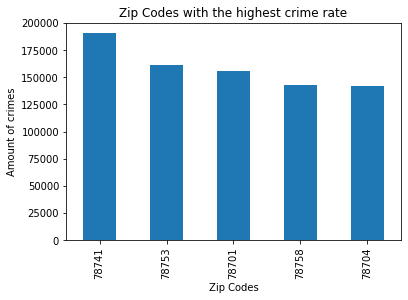

In [37]:
Top5.plot(kind='bar')
plt.xlabel("Zip Codes")
plt.ylabel("Amount of crimes")

plt.title('Zip Codes with the highest crime rate')

In [38]:
#Top5 = Top5.index
Top5_temp = df[df['Zip Code'].isin(Top5)].groupby(['Zip Code', 'Highest Offense Description'])['Address'].count().sort_values(ascending=False).reset_index()
Top5_temp = Top5_temp.groupby('Zip Code', as_index=False).apply(lambda x: x.nlargest(5, 'Address')).reset_index()



In [39]:
bad_for_family = ['ASSAULT W/INJURY-FAM/DATE VIOL', 'ASSAULT  CONTACT-SEXUAL NATURE', 'ASSAULT BY CONTACT', 'ASSAULT WITH INJURY', 
'AGG ASSAULT', 'ASSAULT BY THREAT', 'SEXUAL ASSAULT W/ OBJECT', 'ASSAULT BY CONTACT FAM/DATING', 
'SEXUAL ASSAULT OF CHILD/OBJECT', 'CRASH/INTOXICATION ASSAULT', 'AGG SEXUAL ASSAULT CHILD/OBJEC',
'ASSAULT BY THREAT FAM/DATING', 'ASSAULT ON PUBLIC SERVANT', 'AGG SEXUAL ASSAULT W OBJECT', 
'AGG ASSAULT ON PUBLIC SERVANT', 'ASSAULT - SCHOOL PERSONNEL', 'AGG KIDNAPPING', 'KIDNAPPING', 
'AGG KIDNAPPING FAM VIO','KIDNAPPING FAM VIO', 'CAPITAL MURDER', 'MURDER', 'RAPE', 'AGG RAPE OF A CHILD', 'STATUTORY RAPE OF CHILD', 
'AGG RAPE', 'RAPE OF A CHILD']

In [40]:
df['Zip Code'].value_counts().sort_values(ascending=False).head(10).index

Index(['78741', '78753', '78701', '78758', '78704', '78745', '78702', '78744',
       '78723', '78752'],
      dtype='object')

In [41]:
df[df['Highest Offense Description'] == 'ASSAULT - SCHOOL PERSONNEL'].count()

Highest Offense Description    20
Report Date Time               20
Report Date                    20
Report Time                    20
Location Type                  20
Address                        20
Zip Code                       20
X-coordinate                   20
Y-coordinate                   20
Latitude                       20
Longitude                      20
Location                       20
hour                           20
year                           20
dtype: int64

In [42]:
temp1=df[df['Highest Offense Description'].isin(bad_for_family) ].groupby(['Zip Code', 'Highest Offense Description'])['Address'].count().reset_index()


In [43]:
df

,Highest Offense Description,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,X-coordinate,Y-coordinate,Latitude,Longitude,Location,hour,year
0,CRIMINAL TRESPASS,03/30/2019 08:59:00 PM,03/30/2019,2059.0,GAS / SERVICE STATIONS,900 N IH 35 SVRD SB,78701,3117057.0,3117057.0,30.269060,-97.734085,"(30.26905967, -97.73408544)",20.0,2019
1,THEFT,04/01/2019 03:47:00 PM,04/01/2019,1547.0,RESIDENCE / HOME,5512 GLOUCESTER LN,78723,3133783.0,3133783.0,30.302208,-97.680177,"(30.30220794, -97.6801768)",15.0,2019
2,AGG ROBBERY/DEADLY WEAPON,09/14/2017 10:37:00 PM,09/14/2017,2237.0,STREETS / HWY / ROAD / ALLEY,E ST JOHNS AVE / ROLAND JOHNSON DR,78752,3125442.0,3125442.0,30.333542,-97.705762,"(30.33354183, -97.70576196)",22.0,2017
3,FAMILY DISTURBANCE,04/02/2019 01:49:00 AM,04/02/2019,149.0,RESTAURANTS,7100 N IH 35 SVRD SB,78752,3125614.0,3125614.0,30.332481,-97.705246,"(30.3324806, -97.70524551)",1.0,2019
4,POSS MARIJUANA,03/30/2019 10:36:00 PM,03/30/2019,2236.0,STREETS / HWY / ROAD / ALLEY,1500 N IH 35 SVRD SB,78701,3117721.0,3117721.0,30.274861,-97.731825,"(30.27486103, -97.73182518)",22.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124413,FAMILY DISTURBANCE,08/28/2018 07:47:00 PM,08/28/2018,1947.0,RESIDENCE / HOME,1901 ONION CREEK PKWY,78748,3097240.0,3097240.0,30.137575,-97.800326,"(30.13757481, -97.80032624)",19.0,2018
2124414,BURGLARY OF VEHICLE,11/30/2010 03:29:00 PM,11/30/2010,1529.0,PARKING LOTS / GARAGE,12410 N LAMAR BLVD,78758,3133289.0,3133289.0,30.406682,-97.678869,"(30.40668179, -97.67886904)",15.0,2010
2124415,CRIMINAL TRESPASS,04/18/2007 10:43:00 PM,04/18/2007,2243.0,RESIDENCE / HOME,1801 E 4TH ST,78702,3120371.0,3120371.0,30.259833,-97.723834,"(30.25983293, -97.72383422)",22.0,2007
2124416,BURGLARY OF VEHICLE,12/15/2009 10:38:00 PM,12/15/2009,2238.0,PARKING LOTS / GARAGE,3110 ESPERANZA XING,78758,3119609.0,3119609.0,30.399350,-97.722476,"(30.39935012, -97.72247569)",22.0,2009


In [134]:
X = df.drop([ 'Report Date Time', 'Report Date', 'Report Time', 'Address', 'X-coordinate', 
             'Y-coordinate', 'Latitude', 'Longitude', 'Location', 'hour'], axis=1)

In [135]:
X

,Highest Offense Description,Location Type,zipcode,year
0,CRIMINAL TRESPASS,GAS / SERVICE STATIONS,78701,2019
1,THEFT,RESIDENCE / HOME,78723,2019
2,AGG ROBBERY/DEADLY WEAPON,STREETS / HWY / ROAD / ALLEY,78752,2017
3,FAMILY DISTURBANCE,RESTAURANTS,78752,2019
4,POSS MARIJUANA,STREETS / HWY / ROAD / ALLEY,78701,2019
...,...,...,...,...
2124413,FAMILY DISTURBANCE,RESIDENCE / HOME,78748,2018
2124414,BURGLARY OF VEHICLE,PARKING LOTS / GARAGE,78758,2010
2124415,CRIMINAL TRESPASS,RESIDENCE / HOME,78702,2007
2124416,BURGLARY OF VEHICLE,PARKING LOTS / GARAGE,78758,2009


In [136]:
X.replace([np.inf, -np.inf], np.nan)

,Highest Offense Description,Location Type,zipcode,year
0,CRIMINAL TRESPASS,GAS / SERVICE STATIONS,78701,2019
1,THEFT,RESIDENCE / HOME,78723,2019
2,AGG ROBBERY/DEADLY WEAPON,STREETS / HWY / ROAD / ALLEY,78752,2017
3,FAMILY DISTURBANCE,RESTAURANTS,78752,2019
4,POSS MARIJUANA,STREETS / HWY / ROAD / ALLEY,78701,2019
...,...,...,...,...
2124413,FAMILY DISTURBANCE,RESIDENCE / HOME,78748,2018
2124414,BURGLARY OF VEHICLE,PARKING LOTS / GARAGE,78758,2010
2124415,CRIMINAL TRESPASS,RESIDENCE / HOME,78702,2007
2124416,BURGLARY OF VEHICLE,PARKING LOTS / GARAGE,78758,2009


In [137]:
X.isnull().sum()*100/X.isnull().count()


Highest Offense Description    0.0
Location Type                  0.0
zipcode                        0.0
year                           0.0
dtype: float64

In [139]:
df

,Highest Offense Description,Report Date Time,Report Date,Report Time,Location Type,Address,zipcode,X-coordinate,Y-coordinate,Latitude,Longitude,Location,hour,year
0,CRIMINAL TRESPASS,03/30/2019 08:59:00 PM,03/30/2019,2059.0,GAS / SERVICE STATIONS,900 N IH 35 SVRD SB,78701,3117057.0,3117057.0,30.269060,-97.734085,"(30.26905967, -97.73408544)",20.0,2019
1,THEFT,04/01/2019 03:47:00 PM,04/01/2019,1547.0,RESIDENCE / HOME,5512 GLOUCESTER LN,78723,3133783.0,3133783.0,30.302208,-97.680177,"(30.30220794, -97.6801768)",15.0,2019
2,AGG ROBBERY/DEADLY WEAPON,09/14/2017 10:37:00 PM,09/14/2017,2237.0,STREETS / HWY / ROAD / ALLEY,E ST JOHNS AVE / ROLAND JOHNSON DR,78752,3125442.0,3125442.0,30.333542,-97.705762,"(30.33354183, -97.70576196)",22.0,2017
3,FAMILY DISTURBANCE,04/02/2019 01:49:00 AM,04/02/2019,149.0,RESTAURANTS,7100 N IH 35 SVRD SB,78752,3125614.0,3125614.0,30.332481,-97.705246,"(30.3324806, -97.70524551)",1.0,2019
4,POSS MARIJUANA,03/30/2019 10:36:00 PM,03/30/2019,2236.0,STREETS / HWY / ROAD / ALLEY,1500 N IH 35 SVRD SB,78701,3117721.0,3117721.0,30.274861,-97.731825,"(30.27486103, -97.73182518)",22.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124413,FAMILY DISTURBANCE,08/28/2018 07:47:00 PM,08/28/2018,1947.0,RESIDENCE / HOME,1901 ONION CREEK PKWY,78748,3097240.0,3097240.0,30.137575,-97.800326,"(30.13757481, -97.80032624)",19.0,2018
2124414,BURGLARY OF VEHICLE,11/30/2010 03:29:00 PM,11/30/2010,1529.0,PARKING LOTS / GARAGE,12410 N LAMAR BLVD,78758,3133289.0,3133289.0,30.406682,-97.678869,"(30.40668179, -97.67886904)",15.0,2010
2124415,CRIMINAL TRESPASS,04/18/2007 10:43:00 PM,04/18/2007,2243.0,RESIDENCE / HOME,1801 E 4TH ST,78702,3120371.0,3120371.0,30.259833,-97.723834,"(30.25983293, -97.72383422)",22.0,2007
2124416,BURGLARY OF VEHICLE,12/15/2009 10:38:00 PM,12/15/2009,2238.0,PARKING LOTS / GARAGE,3110 ESPERANZA XING,78758,3119609.0,3119609.0,30.399350,-97.722476,"(30.39935012, -97.72247569)",22.0,2009


In [141]:
df = df[df['zipcode'] != 'nan']

In [142]:
temp = df.groupby(['zipcode', 'year'])['Location Type'].count().sort_values(ascending=False).reset_index()

In [143]:
temp

,zipcode,year,Location Type
0,78741,2007,14251
1,78741,2008,14099
2,78741,2009,13946
3,78741,2006,13842
4,78741,2010,13752
...,...,...,...
952,78615,2008,1
953,78615,2006,1
954,78615,2004,1
955,78654,2005,1


In [145]:
df2 = temp.pivot("zipcode", "year", "Location Type")

In [146]:
df2

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
zipcode,,,,,,,,,,,,,,,,,,
76574,NaN,1.0,4.0,1.0,NaN,3.0,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78610,NaN,2.0,16.0,14.0,9.0,7.0,11.0,9.0,8.0,7.0,2.0,2.0,6.0,6.0,4.0,4.0,3.0,5.0
78612,NaN,2.0,NaN,1.0,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
78613,NaN,385.0,442.0,304.0,347.0,345.0,479.0,455.0,448.0,447.0,449.0,441.0,532.0,564.0,506.0,503.0,567.0,155.0
78615,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78754,NaN,616.0,652.0,798.0,979.0,1265.0,1477.0,1536.0,1412.0,1454.0,1283.0,1332.0,1357.0,1208.0,1257.0,1317.0,1227.0,323.0
78756,NaN,1265.0,1188.0,1254.0,1228.0,1259.0,1196.0,1146.0,1121.0,1018.0,963.0,824.0,843.0,837.0,801.0,849.0,722.0,221.0
78757,NaN,3690.0,3491.0,3735.0,3778.0,3600.0,3673.0,3554.0,3593.0,3516.0,3282.0,3111.0,2807.0,2771.0,2517.0,2295.0,2463.0,709.0


In [147]:
df2 = df2.fillna(0)

In [148]:
del df2[2019]

In [149]:
#X_mm.to_csv('Desktop/X_mm.tsv', sep='\t', index=False, header=False)

In [150]:
# Y is the target variable
Y = df2[2018]
# X is the feature set which includes
X = df2.drop(2018, axis=1)

In [151]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import scipy.stats as stats
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

In [152]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

The number of observations in training set is 54
The number of observations in test set is 14


In [153]:
# Function to calculate mean absolute error

def mae(y_test, y_preds_test):
    return np.mean(abs(y_test - y_preds_test))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [154]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)


Linear Regression Performance on the test set: MAE = 164.2925


In [155]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.16538e-20): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.93898e-20): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23785e-20): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40181e-20): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.16457e-20): result may not be accurate.
  overwrite_a=True).T
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarni

Best alpha value is: 1000000.0
R-squared of the model in training set is: 0.9982338245468081
-----Test set statistics-----
R-squared of the model in test set is: 0.9898635550430239
Mean absolute error of the prediction is: 124.26800508182826
Mean squared error of the prediction is: 39933.921461883
Root mean squared error of the prediction is: 199.83473537371574
Mean absolute percentage error of the prediction is: inf


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [156]:
lasso_model = LassoCV(alphas=alphas, cv=5)

lasso_model.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_model.predict(X_train)
y_preds_test = lasso_model.predict(X_test)

print("Best alpha value is: {}".format(lasso_model.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_model.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_model.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41594.1837736133, tolerance: 24069.402627906984
  tol, rng, random, positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86989.89402468206, tolerance: 24069.402627906984
  tol, rng, random, positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120482.34420310403, tolerance: 24069.402627906984
  tol, rng, random, positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

Best alpha value is: 10000.0
R-squared of the model in training set is: 0.9973990790397322
-----Test set statistics-----
R-squared of the model in test set is: 0.9914586834628589
Mean absolute error of the prediction is: 123.19383306213307
Mean squared error of the prediction is: 33649.6932823111
Root mean squared error of the prediction is: 183.4385272572561
Mean absolute percentage error of the prediction is: inf


In [157]:
elasticNet_model = ElasticNetCV(alphas=alphas, cv=5) 
elasticNet_model.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticNet_model.predict(X_train)
y_preds_test = elasticNet_model.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticNet_model.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticNet_model.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.997929546476535
-----Test set statistics-----
R-squared of the model on the test set is: 0.9935878201247351
Mean absolute error of the prediction is: 108.30292168090214
Mean squared error of the prediction is: 25261.666059959964
Root mean squared error of the prediction is: 158.93918981786703
Mean absolute percentage error of the prediction is: inf


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77471.5162526484, tolerance: 24069.402627906984
  tol, rng, random, positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94926.16817215757, tolerance: 24069.402627906984
  tol, rng, random, positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120797.3497136717, tolerance: 24069.402627906984
  tol, rng, random, positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase

In [158]:
elasticNet_model.predict(X_test)

array([  29.70867308, 2252.04539734,  741.66211406,  506.94341448,
       3201.41599323, 2266.32428489, 7047.42336244,   59.0582476 ,
        943.37993545,  170.37058605,   43.43719949,   29.01632694,
       1507.11577129,   29.52642196])

In [159]:
from sklearn.tree import DecisionTreeRegressor

In [160]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X)

In [161]:
df2['predicted_DT'] = y_pred

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, ShuffleSplit


In [163]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
def fit_and_predict(model):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    R2 = model.score(X_train, y_train)
    model_mae = mae(y_test, model_pred)
    cv = ShuffleSplit(n_splits=7, test_size=0.3, random_state=0)
    accuracies = cross_val_score(estimator=model, X=X_train, y=y_train,cv=cv)
    print("R-squared of the model in training set is: {}\n".format(R2),'Cross_val: {}\n'.format(accuracies),'Mean absolute error of the prediction is: {}'.format(model_mae))
    # Return the performance metric
    return model_mae

In [164]:
lr = LinearRegression()
lr_mae = fit_and_predict(lr)


R-squared of the model in training set is: 0.9989817121376586
 Cross_val: [0.97211638 0.99393555 0.98777472 0.9811332  0.99271115 0.9671613
 0.96503742]
 Mean absolute error of the prediction is: 164.29245917787446


In [165]:
DT = DecisionTreeRegressor(random_state=0)
dt_mae = fit_and_predict(DT)

R-squared of the model in training set is: 1.0
 Cross_val: [0.90589999 0.97039813 0.96901701 0.87724207 0.96726367 0.97101967
 0.97169785]
 Mean absolute error of the prediction is: 108.5


In [166]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_predict(random_forest)

R-squared of the model in training set is: 0.9922758975416925
 Cross_val: [0.89981715 0.95750357 0.97210408 0.9231227  0.95995528 0.96702146
 0.98634847]
 Mean absolute error of the prediction is: 171.89285714285714


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [167]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_predict(gradient_boosted)

R-squared of the model in training set is: 0.9999996925996619
 Cross_val: [0.90678268 0.96515743 0.97602167 0.95650551 0.9815898  0.97502085
 0.99445428]
 Mean absolute error of the prediction is: 103.93369751941046


In [168]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_predict(knn)

R-squared of the model in training set is: 0.9366003373090093
 Cross_val: [0.7431773  0.84650419 0.8854402  0.63239882 0.71592001 0.86412542
 0.89100792]
 Mean absolute error of the prediction is: 214.62142857142857


Text(0.5, 1.0, 'Model Comparison on Test MAE')

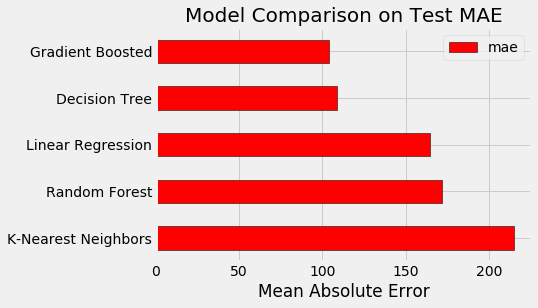

In [169]:
plt.style.use('fivethirtyeight')
#figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Decision Tree', 
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae,dt_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20)

In [170]:

final_model = GradientBoostingRegressor(random_state=60)
final_model.fit(X_train, y_train)
final_pred = final_model.predict(X)


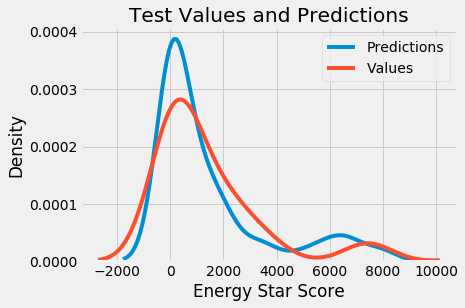

In [171]:
# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

In [172]:
df2['prediction'] = final_pred

In [173]:
df2

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,predicted_DT,prediction
zipcode,,,,,,,,,,,,,,,,,,,
76574,0.0,1.0,4.0,1.0,0.0,3.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312157
78610,0.0,2.0,16.0,14.0,9.0,7.0,11.0,9.0,8.0,7.0,2.0,2.0,6.0,6.0,4.0,4.0,3.0,3.0,2.899838
78612,0.0,2.0,0.0,1.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.312157
78613,0.0,385.0,442.0,304.0,347.0,345.0,479.0,455.0,448.0,447.0,449.0,441.0,532.0,564.0,506.0,503.0,567.0,615.0,604.916558
78615,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78754,0.0,616.0,652.0,798.0,979.0,1265.0,1477.0,1536.0,1412.0,1454.0,1283.0,1332.0,1357.0,1208.0,1257.0,1317.0,1227.0,1227.0,1227.599041
78756,0.0,1265.0,1188.0,1254.0,1228.0,1259.0,1196.0,1146.0,1121.0,1018.0,963.0,824.0,843.0,837.0,801.0,849.0,722.0,722.0,725.309013
78757,0.0,3690.0,3491.0,3735.0,3778.0,3600.0,3673.0,3554.0,3593.0,3516.0,3282.0,3111.0,2807.0,2771.0,2517.0,2295.0,2463.0,2458.0,2222.412671


In [174]:
df2.columns

Index([          2002,           2003,           2004,           2005,
                 2006,           2007,           2008,           2009,
                 2010,           2011,           2012,           2013,
                 2014,           2015,           2016,           2017,
                 2018, 'predicted_DT',   'prediction'],
      dtype='object', name='year')

In [176]:
hp = pd.read_csv('houseprise.csv')

In [177]:
del hp['Unnamed: 0']

In [178]:
hp

,home_type,home_size,bathrooms,latitude,longitude,zestimate_amount,year_built,Address,zipcode,Appraised Value,Beds,predicted value
0,SingleFamily,1714,2,30.283120,-97.801518,948283,1972,503 HONEYCOMB RDG TX,78746,1217527,3,1217527
1,SingleFamily,2045,2,30.277183,-97.789601,1276854,1982,3211 PARK HILLS DR TX,78746,1084753,4,1072186
2,SingleFamily,3018,4,30.281878,-97.787439,1292171,1984,3309 PARK HILLS DR TX,78746,1126000,5,1126000
3,SingleFamily,3352,3,30.288623,-97.839915,942203,1989,6500 MINIKAHDA CV TX,78746,818000,5,818000
4,SingleFamily,3602,4,30.328302,-97.805591,929297,1989,3200 LOOKOUT LN TX,78746,871722,4,871722
...,...,...,...,...,...,...,...,...,...,...,...,...
32144,SingleFamily,2119,2,30.358768,-97.548586,245715,2003,11500 SHADY MEADOW WAY TX,78653,239500,4,237460
32145,SingleFamily,1352,2,30.354156,-97.518881,202229,2016,13514 ABRAHAM LINCOLN ST TX,78653,193622,3,195844
32146,SingleFamily,2640,3,30.357368,-97.541451,286959,2006,13829 LONG SHADOW DR TX,78653,268169,4,275600
32147,SingleFamily,1730,2,30.351644,-97.511109,219056,2013,19401 TAYSHAS ST TX,78653,237408,4,230101


In [131]:
df2

,home_type,home_size,bathrooms,latitude,longitude,zestimate_amount,year_built,Address,zipcode,Appraised Value,Beds,predicted value
0,SingleFamily,1714,2,30.283120,-97.801518,948283,1972,503 HONEYCOMB RDG TX,78746,1217527,3,1217527
1,SingleFamily,2045,2,30.277183,-97.789601,1276854,1982,3211 PARK HILLS DR TX,78746,1084753,4,1072186
2,SingleFamily,3018,4,30.281878,-97.787439,1292171,1984,3309 PARK HILLS DR TX,78746,1126000,5,1126000
3,SingleFamily,3352,3,30.288623,-97.839915,942203,1989,6500 MINIKAHDA CV TX,78746,818000,5,818000
4,SingleFamily,3602,4,30.328302,-97.805591,929297,1989,3200 LOOKOUT LN TX,78746,871722,4,871722
...,...,...,...,...,...,...,...,...,...,...,...,...
32144,SingleFamily,2119,2,30.358768,-97.548586,245715,2003,11500 SHADY MEADOW WAY TX,78653,239500,4,237460
32145,SingleFamily,1352,2,30.354156,-97.518881,202229,2016,13514 ABRAHAM LINCOLN ST TX,78653,193622,3,195844
32146,SingleFamily,2640,3,30.357368,-97.541451,286959,2006,13829 LONG SHADOW DR TX,78653,268169,4,275600
32147,SingleFamily,1730,2,30.351644,-97.511109,219056,2013,19401 TAYSHAS ST TX,78653,237408,4,230101


In [120]:
df2.rename(columns = {'Zip Code':'zipcode'}, inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [ ]:
df3['zipcode'] = df3.index

In [206]:
df3['zipcode']= df3.zipcode.astype(int) 

In [207]:
master_df1=pd.merge(hp, df3.drop(['predicted_DT','prediction'], axis=1), on ='zipcode')


In [212]:
master_df1.columns

Index([       'home_type',        'home_size',        'bathrooms',
               'latitude',        'longitude', 'zestimate_amount',
             'year_built',          'Address',          'zipcode',
        'Appraised Value',             'Beds',  'predicted value',
                     2002,               2003,               2004,
                     2005,               2006,               2007,
                     2008,               2009,               2010,
                     2011,               2012,               2013,
                     2014,               2015,               2016,
                     2017,               2018],
      dtype='object')

In [205]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 20 columns):
zipcode         68 non-null object
2002            68 non-null float64
2003            68 non-null float64
2004            68 non-null float64
2005            68 non-null float64
2006            68 non-null float64
2007            68 non-null float64
2008            68 non-null float64
2009            68 non-null float64
2010            68 non-null float64
2011            68 non-null float64
2012            68 non-null float64
2013            68 non-null float64
2014            68 non-null float64
2015            68 non-null float64
2016            68 non-null float64
2017            68 non-null float64
2018            68 non-null float64
predicted_DT    68 non-null float64
prediction      68 non-null float64
dtypes: float64(19), object(1)
memory usage: 10.8+ KB


In [202]:
df3 = df3.reset_index()

In [203]:
df3

year,zipcode,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,predicted_DT,prediction
0,76574,0.0,1.0,4.0,1.0,0.0,3.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312157
1,78610,0.0,2.0,16.0,14.0,9.0,7.0,11.0,9.0,8.0,7.0,2.0,2.0,6.0,6.0,4.0,4.0,3.0,3.0,2.899838
2,78612,0.0,2.0,0.0,1.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.312157
3,78613,0.0,385.0,442.0,304.0,347.0,345.0,479.0,455.0,448.0,447.0,449.0,441.0,532.0,564.0,506.0,503.0,567.0,615.0,604.916558
4,78615,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,78754,0.0,616.0,652.0,798.0,979.0,1265.0,1477.0,1536.0,1412.0,1454.0,1283.0,1332.0,1357.0,1208.0,1257.0,1317.0,1227.0,1227.0,1227.599041
64,78756,0.0,1265.0,1188.0,1254.0,1228.0,1259.0,1196.0,1146.0,1121.0,1018.0,963.0,824.0,843.0,837.0,801.0,849.0,722.0,722.0,725.309013
65,78757,0.0,3690.0,3491.0,3735.0,3778.0,3600.0,3673.0,3554.0,3593.0,3516.0,3282.0,3111.0,2807.0,2771.0,2517.0,2295.0,2463.0,2458.0,2222.412671
66,78758,0.0,8206.0,8500.0,8884.0,9496.0,9699.0,9963.0,9762.0,10369.0,8810.0,9055.0,8599.0,8043.0,7933.0,7945.0,7869.0,7433.0,6937.0,6596.090326


In [215]:
def recommend_houses(budget, crime_rate):
    return master_df1[(master_df1['predicted value']<budget )& (master_df1[2018]< crime_rate) ]\
.sort_values(by ='predicted value', ascending=False).head(10)


In [216]:
recommend_houses(300000, 600)

,home_type,home_size,bathrooms,latitude,longitude,zestimate_amount,year_built,Address,zipcode,Appraised Value,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
12532,SingleFamily,1872,2,30.382649,-97.609062,449967,1975,5401 GREGG LN TX,78653,303687,...,112.0,114.0,96.0,83.0,79.0,93.0,101.0,135.0,127.0,141.0
15776,SingleFamily,2792,3,30.362251,-97.540358,347740,2017,11901 VOELKER REINHARDT WAY TX,78653,323418,...,112.0,114.0,96.0,83.0,79.0,93.0,101.0,135.0,127.0,141.0
17475,SingleFamily,3060,3,30.276452,-97.564899,689102,1984,7607 NEZ PERCE TRACE TX,78653,288762,...,112.0,114.0,96.0,83.0,79.0,93.0,101.0,135.0,127.0,141.0
15915,SingleFamily,1917,2,30.303926,-97.512357,344300,1985,10705 PARSONS RD TX,78653,246875,...,112.0,114.0,96.0,83.0,79.0,93.0,101.0,135.0,127.0,141.0
14870,SingleFamily,2494,3,30.362580,-97.540732,300256,2017,11824 VOELKER REINHARDT WAY TX,78653,252660,...,112.0,114.0,96.0,83.0,79.0,93.0,101.0,135.0,127.0,141.0
12548,SingleFamily,3004,3,30.357118,-97.542093,305704,2007,13816 LONG SHADOW DR TX,78653,286686,...,112.0,114.0,96.0,83.0,79.0,93.0,101.0,135.0,127.0,141.0
14512,SingleFamily,2871,3,30.357385,-97.542891,331298,2006,13800 LONG SHADOW DR TX,78653,296426,...,112.0,114.0,96.0,83.0,79.0,93.0,101.0,135.0,127.0,141.0
17035,SingleFamily,2821,2,30.359535,-97.522937,268946,2017,14009 JAMES GARFIELD ST MANOR TX,78653,304109,...,112.0,114.0,96.0,83.0,79.0,93.0,101.0,135.0,127.0,141.0
17278,SingleFamily,2838,3,30.357655,-97.542181,327396,2006,13813 LONG SHADOW DR TX,78653,299840,...,112.0,114.0,96.0,83.0,79.0,93.0,101.0,135.0,127.0,141.0
12461,SingleFamily,1624,2,30.309148,-97.507005,458544,2011,19610 LOCKWOOD RD TX,78653,313573,...,112.0,114.0,96.0,83.0,79.0,93.0,101.0,135.0,127.0,141.0
